## 1. Core Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.metrics import log_loss
from sklearn.model_selection import GridSearchCV,KFold
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB


## 2. Data exploratory analysis and visualisations

In [2]:
#Download colon data and label
colon = pd.read_csv('colonCancerData.csv', index_col=0)
colon_label = pd.read_csv('label.csv')

In [3]:
print('The number of samples is: {}\nThe number of features is: {}'.format(
colon.shape[0], colon.shape[1]))

The number of samples is: 62
The number of features is: 2000


In [4]:
#show the colon data format
colon

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,8589.4163,5468.2409,4263.4075,4064.9357,1997.8929,5282.3250,2169.7200,2773.4212,7526.3862,4607.67620,...,99.110714,67.56125,259.91250,138.89875,88.23250,39.667857,67.82875,75.67750,83.52250,28.70125
1,9164.2537,6719.5295,4883.4487,3718.1589,2015.2214,5569.9071,3849.0588,2793.3875,7017.7338,4802.25240,...,126.789290,92.23875,96.27625,150.59000,82.23750,85.033333,152.19500,186.56750,44.47250,16.77375
2,3825.7050,6970.3614,5369.9688,4705.6500,1166.5536,1572.1679,1325.4025,1472.2587,3296.9512,2786.58210,...,151.877380,82.71500,31.10250,193.92000,76.97250,224.620240,31.22500,42.65625,16.09250,15.15625
3,6246.4487,7823.5341,5955.8350,3975.5643,2002.6131,2130.5429,1531.1425,1714.6312,3869.7850,4989.40710,...,152.595240,41.68375,5.92500,183.00625,74.52875,67.710714,48.33875,42.52000,49.98250,16.08500
4,3230.3287,3694.4500,3400.7400,3463.5857,2181.4202,2922.7821,2069.2463,2948.5750,3303.3712,3109.41310,...,126.464290,76.60375,161.35000,61.70125,54.56375,223.359520,73.09875,57.59875,7.48875,31.81250
5,2510.3250,1960.6545,1566.3150,3072.8161,1810.2048,1673.5643,1290.4212,2465.8462,1675.5438,1312.80830,...,122.533330,47.53500,147.23625,28.31000,33.19500,91.850000,5.87875,36.29750,9.81500,21.88375
6,7126.5988,3779.0682,3705.5537,6594.5143,2460.9048,3775.6821,2621.4188,2047.2812,6411.2675,3857.11900,...,147.804760,51.03250,80.19000,76.48500,98.53750,54.621429,30.54000,52.96125,37.23625,24.44500
7,4028.7100,3156.1591,2870.2550,4417.5911,1854.1060,2828.3036,1427.5262,3390.7062,4373.0438,3080.45120,...,116.194050,46.67375,172.78875,51.82375,97.85500,98.982143,24.19625,29.76625,44.37625,52.29000
8,9330.6787,7017.2295,4723.7825,9491.5339,5346.5417,1557.1429,1969.0800,2295.4025,6880.3462,6162.89290,...,111.138100,42.14625,277.85375,176.10375,149.15625,209.911900,99.91500,122.44125,40.39125,26.84750
9,5271.5175,4740.7682,3318.5137,6792.3482,2632.8893,5449.2071,4623.2125,3277.4038,4488.0600,3343.81070,...,401.770240,141.37250,215.88750,71.03750,93.52125,136.040480,43.23000,67.15000,65.61000,44.04250


In [4]:
def ConvertLabels(labels):
    '''
    This function is used to convert the label to 0 and 1 range.
    '''
    
    column_name = 'label'
    labels.loc[colon_label[column_name] > 0] = 1
    labels.loc[colon_label[column_name] < 0] = 0
    
    return labels


In [6]:
#Convert the colon label and concatenate data and label.
colon_label = ConvertLabels(colon_label)
data_label = pd.concat([colon, colon_label], axis = 1, sort= False)

Here, we show the kernel density estimate for the first 80 gene intensity values, separately for each class. From this figure, We can find some genes with different kurtosis and skewness may be useful to classify normal and tumor tissue. It can also be found that genes in normal tissue has higher maximum value than tumor tissue.

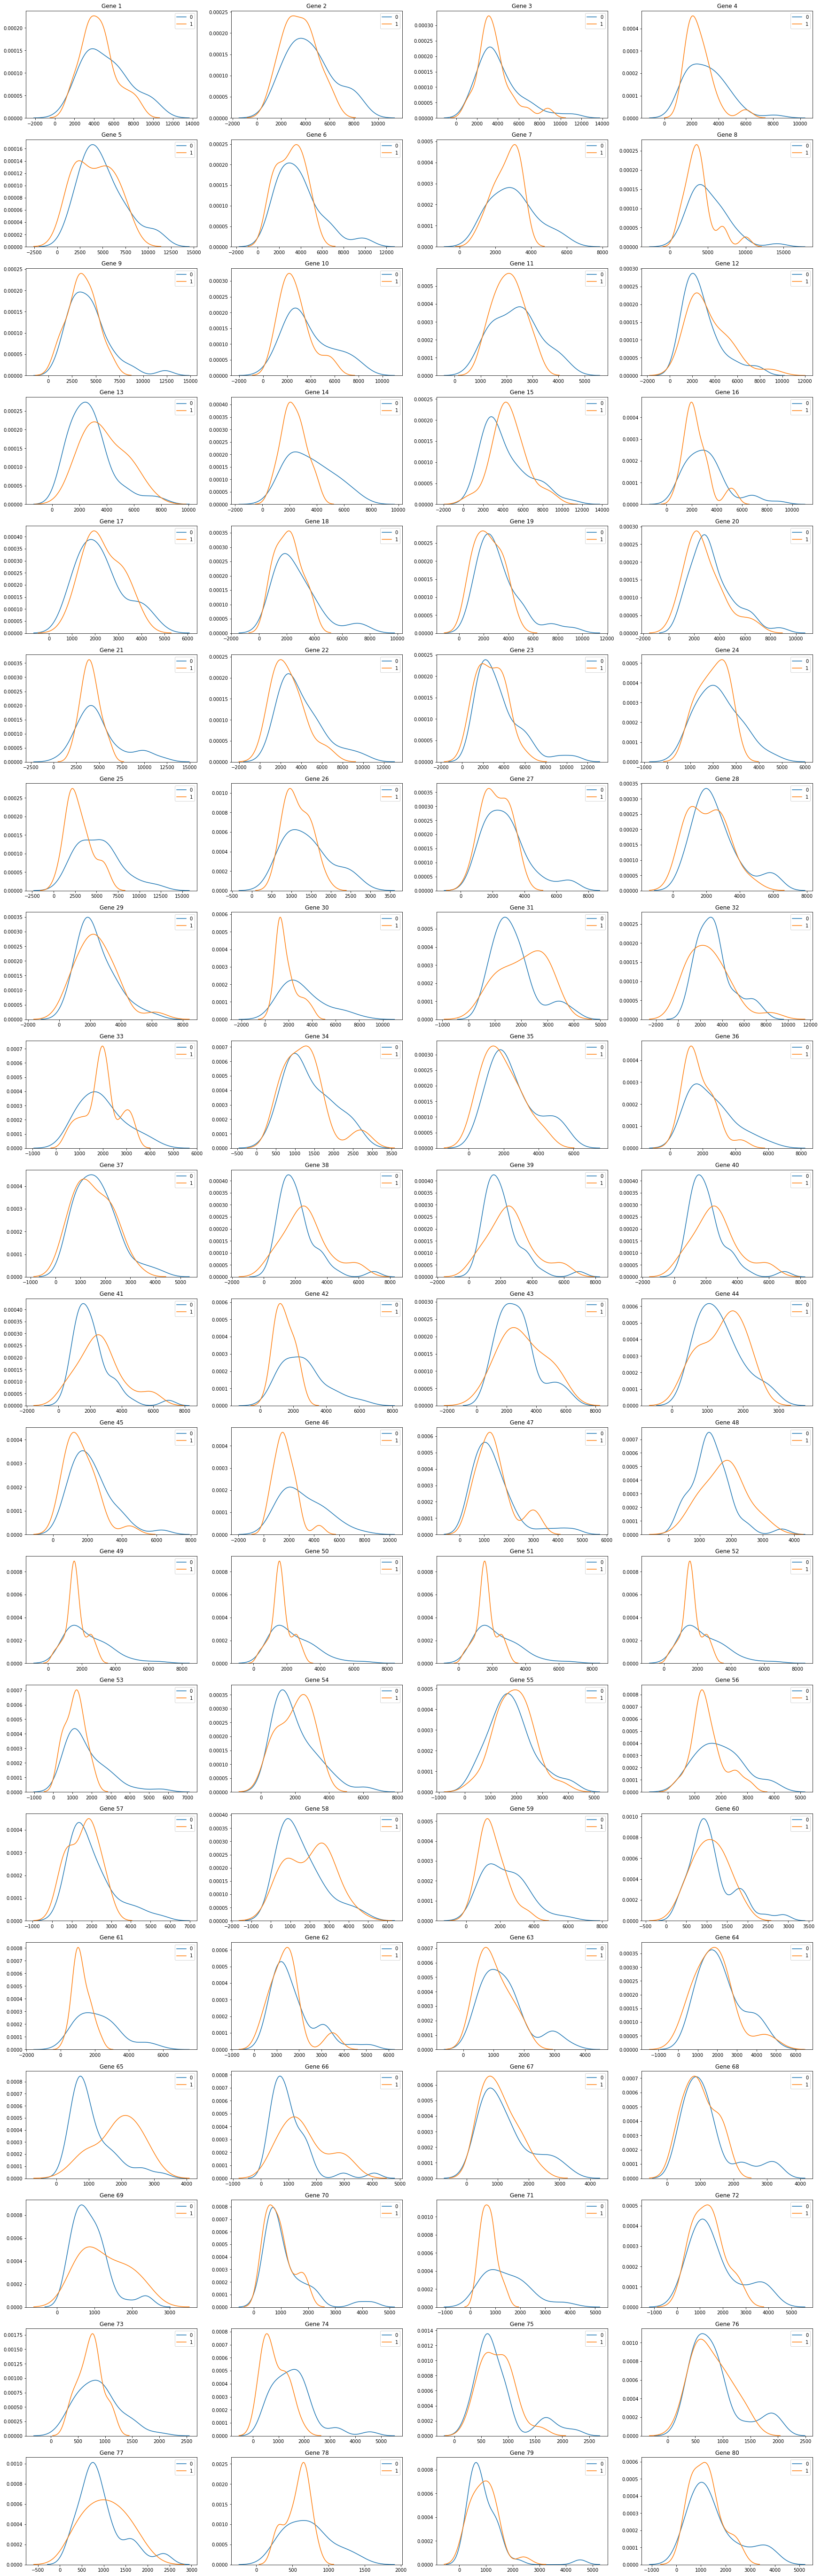

In [7]:
fig, ax = plt.subplots(20,4, figsize=(30,100))
feature_number = [str(i) for i in range(1, 81)]
labels_number = [0, 1]
jj = -1
for ii, feature in enumerate(feature_number):
    if ii % 4 == 0:
        jj += 1
    for label in labels_number:
        sns.kdeplot(data_label[data_label['label']==label][feature].values.reshape(-1,), \
                    ax=ax[jj][ii % 4], label=label)
jj = -1
for ii, feature in enumerate(feature_number): # Set band titles
    if ii % 4 == 0:
        jj += 1
    ax[jj][ii % 4].set_title("Gene {}".format(feature))
plt.show()

### Data preprocessing

We use `StandardScaler` function to standardize *colon cancer* data with zero mean and unit variance. After that, We calculate the correlation between each genes. We also calculate the percentage of the genes which have high correlation. This genes may be redundent.

In [7]:
scaler = StandardScaler()
colon_scale = scaler.fit_transform(colon)


In [8]:
gene = pd.read_csv('colonGeneDescriptions.csv')
gene_desc = gene['2']
gene_desc.loc[pd.isna(gene_desc)] = 'NA'

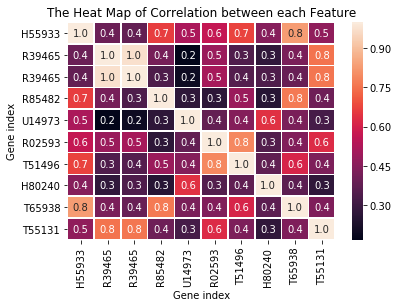

In [15]:
pd_scale = pd.DataFrame(colon_scale)
pd_scale.columns = gene['1']
corr = np.round(pd_scale.iloc[:, 0:10].corr(method='pearson'),4)
fig, ax = plt.subplots(1, 1)
sns.heatmap(np.abs(corr), annot=True, fmt=".1f", linewidths=.5)
plt.title('The Heat Map of Correlation between each Feature')
plt.xlabel('Gene index')
plt.ylabel('Gene index')
plt.savefig('Gene heatmap')

In [9]:
corr = np.corrcoef(colon_scale, rowvar = False)
num = np.sum(corr > 0.6) - 2000
perc = round(num / (2000 * 2000 - 2000) * 100, 2)
print('The percentage of genes with correlation greater than 0.6 is: {}%'.format(perc))

The percentage of genes with correlation greater than 0.6 is: 20.98%


In [10]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y.label.values == target, 0], X_2d[y.label.values == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)


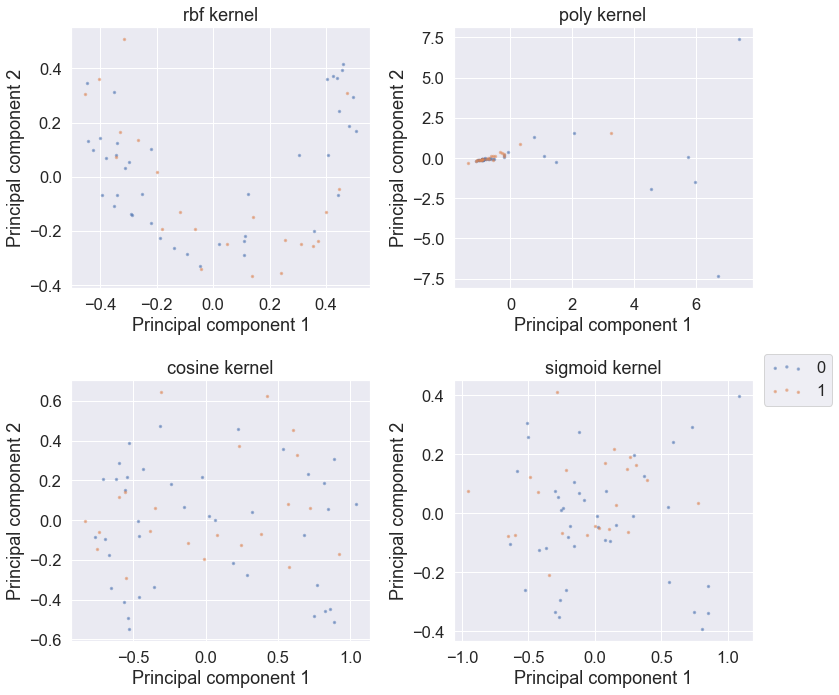

In [11]:
#PCA transform 2000 dimension to 2 dimension and plot
kernels = ['rbf', 'poly', 'cosine', 'sigmoid']

sns.set(font_scale=1.5)
fig, ax = plt.subplots(2,2,figsize=(12,10))
for ii, kernel in enumerate(kernels):
    X_kpca_2d = KernelPCA(n_components=2, kernel=kernel).fit_transform(colon_scale)
    plt.subplot(2,2,ii+1)
    scatter_2d_label(X_kpca_2d, colon_label)
    plt.title('{} kernel'.format(kernel))
    plt.xlabel('Principal component 1')
    plt.ylabel('Principal component 2')
plt.legend(loc='center left', bbox_to_anchor=[1.01, 1.], scatterpoints=3)
fig.tight_layout()
plt.show()

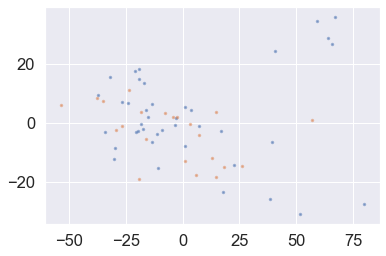

In [12]:
pca = PCA(n_components=62)
X_pca_62d = pca.fit_transform(colon_scale)
colon_label = pd.read_csv('label.csv')
#Convert the colon label and concatenate data and label.
colon_label = ConvertLabels(colon_label)
scatter_2d_label(X_pca_62d, colon_label)
colon_label = np.c_[colon_label].reshape(-1,)

Here is the cumulative explained variance ratio for different number of PCs.

In [13]:
np.cumsum(pca.explained_variance_ratio_)

array([0.44955648, 0.54801902, 0.61566943, 0.67222138, 0.70505585,
       0.736347  , 0.75966579, 0.7818428 , 0.79851387, 0.81403902,
       0.82787177, 0.83993946, 0.85035145, 0.8600838 , 0.86854132,
       0.87640445, 0.88414674, 0.89081004, 0.89712368, 0.90300485,
       0.90852608, 0.91377366, 0.91874948, 0.92356079, 0.92812303,
       0.93226267, 0.93633708, 0.94017141, 0.94367086, 0.94699633,
       0.95017446, 0.95319452, 0.95611859, 0.95900835, 0.9617109 ,
       0.96424176, 0.96669363, 0.96903059, 0.9712017 , 0.97331889,
       0.97530488, 0.97723884, 0.97907849, 0.98086708, 0.98261222,
       0.98427997, 0.98587281, 0.98741106, 0.98879838, 0.99014444,
       0.99142942, 0.99265798, 0.9937625 , 0.99482734, 0.99580377,
       0.99672401, 0.99754792, 0.99834631, 0.99899087, 0.99957563,
       1.        , 1.        ])

### Select Data by AUC Value

We first scale the colon data into [0,1] range. Then we make two assumptions, 'Higher value of each gene represent higher probability of getting tumor tissue' and 'Lower value of each gene represent higher probability of getting tumor tissue'. Then we calculate the two auc values. After that, we select genese with auc value greater than 0.8. To examine the performance of data selection, We use KNN classifier with 1 neighborhood as our baseline model and original data with 2000 genes as baseline data. Then we compare the performance of model after feature selection. The results can be seen in the later part.

In [14]:
#normalize the data
minmax = MinMaxScaler()
colon_norm = minmax.fit_transform(colon)
#choose the gene with auc > 0.8
colon_org = colon_norm.copy()
auc = np.ones(2000)
auc_reverse = np.ones(2000)
#calculate two auc values
for i in range(2000):
    auc[i] = roc_auc_score(np.c_[colon_label], colon_org[:,i])
    
for i in range(2000):
    auc_reverse[i] = roc_auc_score(np.c_[colon_label], 1 - colon_org[:,i])

#select data by choosing auc > 0.8
auc_index = list(np.where(auc > 0.8)[0])
#auc_index = []
auc_index_reverse = list(np.where(auc_reverse > 0.8)[0])
#auc_index_reverse = []
colon_select = colon.iloc[:, auc_index + auc_index_reverse]#list addition

In [15]:
#Standardize data after selection
scaler_select = StandardScaler()
colon_select_scale = scaler_select.fit_transform(colon_select)

Choose training data and test data. Since the number of samples is too small, We using the whole dataset to do leave one out cross validation and using the average cross validation accuracy as our judging criteria.

In [16]:
def knnclf(X_train, y_train, Type='original'):
    '''
    This function will take the training data and test data and print out the score
    of average leave one out cross validation accuracy.
    '''
    
    #Using KNN classifier as baseline model
    clf = KNeighborsClassifier(n_neighbors=1)
    #choose sample size as n (number of samples)
    cv = KFold(n_splits=X_train.shape[0])
    #store the validation results
    cv_results = cross_validate(clf, X_train, y_train, cv=cv)
    #using average validation results as comparasion
    print ("KNN classifier accuracy of {} data: {:.3f}".format(
        Type, np.mean(cv_results['test_score'])))

In [17]:
knnclf(colon_select_scale, colon_label, 'selected')
knnclf(colon, colon_label)

KNN classifier accuracy of selected data: 0.806
KNN classifier accuracy of original data: 0.790


From above test, We can find the accuracy of selected data by using AUC value can increase 0.016 classification accuracy. Later we will discuss about other featuer selection methods such as univariate feature selection and TNoM feature selection.

## 3. Model Fit

In [18]:
X_train = colon_select_scale
y_train = colon_label

In [19]:
pca = PCA(n_components=X_train.shape[1])
X_select_pca_62d = pca.fit_transform(colon_select_scale)

In [20]:
random_state = 1234
names = ["Logistic Regression", "Nearest Neighbors", "Linear SVM", "RBF SVM",
         "Decision Tree", "Random Forest", "Neural Net (Multi-layer perceptron)",
         "Naive Bayes", "LDA", "QDA"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(n_neighbors=9),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
    MLPClassifier(random_state=random_state, max_iter=1000),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()
]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
for name, clf in zip(names, classifiers):
    cv = KFold(X_train.shape[0], True, random_state=123)
    cv_results = cross_validate(clf, X_train, y_train, cv=cv)
    clf.fit(X_train, y_train)
    #ca_score[name] = clf.score(X_test, y_test)
    ca_score[name] = np.mean(cv_results['test_score'])
    ce_score[name] = log_loss(y_train, clf.predict_proba(X_train))
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}".format(clf, ca_score[clf], ce_score[clf]))

Classification performance on validation set:
Logistic Regression, accuracy: 0.871, log-loss: 0.178
Nearest Neighbors, accuracy: 0.871, log-loss: 0.265
Linear SVM, accuracy: 0.855, log-loss: 0.241
RBF SVM, accuracy: 0.871, log-loss: 0.250
Decision Tree, accuracy: 0.839, log-loss: 0.000
Random Forest, accuracy: 0.871, log-loss: 0.081
Neural Net (Multi-layer perceptron), accuracy: 0.823, log-loss: 0.021
Naive Bayes, accuracy: 0.823, log-loss: 2.098
LDA, accuracy: 0.774, log-loss: 0.156
QDA, accuracy: 0.645, log-loss: 0.000


Here we choose four reliable classifiers to compare the performance of choosing 10 PCs. 

In [21]:
random_state = 1234
names = ["Nearest Neighbors", "Linear SVM",
         "Decision Tree", "Random Forest"]
classifiers = [
    KNeighborsClassifier(n_neighbors=9),
    SVC(kernel="linear", probability=True, random_state=random_state),
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=10, n_estimators=50,random_state=random_state),
]
ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
for name, clf in zip(names, classifiers):
    cv = KFold(X_train.shape[0], True, random_state=1234)
    cv_results = cross_validate(clf, X_train, y_train, cv=cv)
    clf.fit(X_train, y_train)
    #ca_score[name] = clf.score(X_test, y_test)
    ca_score[name] = np.mean(cv_results['test_score'])
    ce_score[name] = log_loss(y_train, clf.predict_proba(X_train))
print('Classification performance on validation set:')
for clf in names:
    print ("{}, accuracy: {:.3f}, log-loss: {:.3f}".format(clf, ca_score[clf], ce_score[clf]))

Classification performance on validation set:
Nearest Neighbors, accuracy: 0.871, log-loss: 0.265
Linear SVM, accuracy: 0.855, log-loss: 0.241
Decision Tree, accuracy: 0.871, log-loss: 0.000
Random Forest, accuracy: 0.871, log-loss: 0.081


Here using only *Linear SVM* to compare the accuracy of choosing different number of PC components. Set the parameter C equal to 0.01 and gamma equal to 0.001.

In [22]:
random_state = 1234
names = ['Linear SVM']
classifiers = [
    SVC(kernel="linear", probability=True, random_state=random_state),
]

ca_score = {} # Classification accuracy
ce_score = {} # Cross-entropy
cv_results = {}

#set n_splits equal to the number of training samples
cv = KFold(n_splits=X_train.shape[0], shuffle=True)
for i in range(X_train.shape[1]):
    for name, clf in zip(names, classifiers):
        #Store corss validate results of using different number of PC components
        #X_train and y_train can be found before
        cv_results[i] = cross_validate(clf, X_train[:,0:i+1], y_train, cv=cv)
        
        #choosing 'test_score' in cv results and average the test score, test 
        #score means accuracy of choosing different fold. Because only 
        #exit one test data, the accuracy is either 1 or 0.
        ca_score[i] = np.mean(cv_results[i]['test_score'])

Here is the cross validation results:

In [23]:
cv_results[0]

{'fit_time': array([0.00100207, 0.00099325, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00099707, 0.0009973 , 0.00099754, 0.00099707, 0.00099897,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00099683, 0.0009973 , 0.0009973 , 0.0009973 ,
        0.0009973 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00099754, 0.00099754, 0.00099707, 0.00099707,
        0.00099754, 0.        , 0.00099897, 0.        , 0.        ,
        0.        , 0.00099683, 0.00099754, 0.0009973 , 0.0009973 ,
        0.00099754, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00099707, 0.0009973 , 0.00099754, 0.00099754,
        0.00099707, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ]),
 'score_time': array([0.        , 0.        , 0.00099659, 0.0009973 , 0.00099683,
        0.00099707, 0.0009973 , 0.        , 0.        , 

Here is the line plot of average test score of different number of PC components

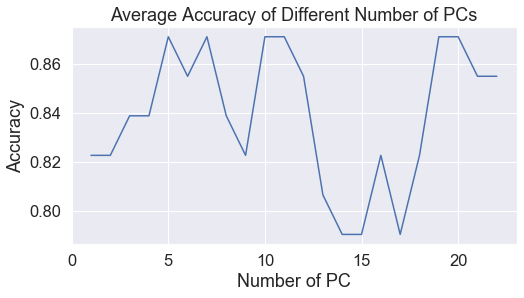

In [24]:
fig, ax = plt.subplots(1, 1, figsize = (8, 4))
plt.subplot(111)

sns.lineplot(x = list(range(1, X_train.shape[1]+1)), y = list(ca_score.values()))
plt.xlabel('Number of PC')
plt.ylabel('Accuracy')
plt.title('Average Accuracy of Different Number of PCs')
plt.show()

Here is only choosing useful components

In [25]:
cv_result1 = cross_validate(clf, X_train[:,[1,2,3,9]], y_train, cv=cv)
np.mean(cv_result1['test_score'])

0.8870967741935484

Here using `gridsearchcv` function to choose the best `C` and `gamma` for SVM

In [26]:
cv = KFold(5, shuffle=True, random_state=1234)
clf = SVC(kernel='rbf')
parameters = {'C': np.logspace(-3,3,7), 'gamma': np.logspace(-4, 1, 6)}
svc_clf = GridSearchCV(
        estimator=clf,
        cv=cv,
        param_grid=parameters,
        scoring='accuracy'
        ).fit(X_pca_62d, colon_label)
cv_results = cross_validate(svc_clf, X_pca_62d, colon_label, cv=cv)
np.mean(cv_results['test_score'])

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.8230769230769232